In [ ]:
import pandas as pd
nodes_df = pd.read_csv('nodes.csv', low_memory=False).rename(columns={'URI:ID': 'name', ':LABEL': 'type'})
edges_df = pd.read_csv('edges.csv', low_memory=False).rename(columns={':START_ID': 'subject', ':END_ID': 'object'})

In [34]:
nodes_df_rna = nodes_df[nodes_df['type'].str.contains("sncRNA")][['name', 'type']]
edges_df_rna = edges_df.merge(nodes_df_rna, left_on='subject', right_on='name').drop(columns=['name']).merge(
    nodes_df_rna, left_on='object', right_on='name').drop(columns=['name'])
edges_df_rna = edges_df_rna[(edges_df_rna[':TYPE'] == 'interacts_with') | (edges_df_rna[':TYPE'] == 'molecularly_interacts_with') |
                            (edges_df_rna[':TYPE'] == 'genetically_interacts_with') | (edges_df_rna[':TYPE'] == 'directly_regulates_activity_of')]
#edges_df_rna = pd.concat([edges_df_rna[['subject','object']],edges_df_rna[['subject','object']].rename(
 #   columns={'subject':'object','object':'subject'})]).drop_duplicates()
edges_df_rna = edges_df_rna[['subject', 'object', ':TYPE']].rename(columns={':TYPE': 'type'})
nodes_df_rna = nodes_df_rna[(nodes_df_rna['name'].isin(edges_df_rna['subject'])) | (nodes_df_rna['name'].isin(edges_df_rna['object']))].reset_index(drop=True)
edges_df_rna.to_csv('edges_grape_v2.0_sncRNA.tsv', sep='\t', index=False)
nodes_df_rna.to_csv('nodes_grape_v2.0_sncRNA.tsv', sep='\t', index=False)
edges_df_rna

,subject,object,type
456,http://biomed.nscc-gz.cn/DB/tsRFun/searchDetai...,https://rnacentral.org/rna/URS0000324096_9606,interacts_with
457,http://biomed.nscc-gz.cn/DB/tsRFun/searchDetai...,https://rnacentral.org/rna/URS0000324096_9606,interacts_with
458,http://biomed.nscc-gz.cn/DB/tsRFun/searchDetai...,https://rnacentral.org/rna/URS0000324096_9606,interacts_with
459,http://biomed.nscc-gz.cn/DB/tsRFun/searchDetai...,https://rnacentral.org/rna/URS0000324096_9606,interacts_with
460,http://biomed.nscc-gz.cn/DB/tsRFun/searchDetai...,https://rnacentral.org/rna/URS0000324096_9606,interacts_with
...,...,...,...
714120,https://rnacentral.org/rna/URS0000A76DCB_9606,https://rnacentral.org/rna/URS0000ABD812_9606,interacts_with
714123,https://rnacentral.org/rna/URS0000A76DCB_9606,https://rnacentral.org/rna/URS00008E3964_9606,interacts_with
714124,https://rnacentral.org/rna/URS0000ABD812_9606,https://rnacentral.org/rna/URS00008E3964_9606,interacts_with
714125,https://rnacentral.org/rna/URS0000ABD812_9606,https://rnacentral.org/rna/URS00008E3A70_9606,interacts_with


In [1]:
from grape import Graph

rnakg = Graph.from_csv(
    edge_path="edges_grape_v2.0_sncRNA.tsv",
    edge_list_separator="\t",
    edge_list_header=True,
    sources_column="subject",
    destinations_column="object",
    edge_list_edge_types_column="type",

    node_path="nodes_grape_v2.0_sncRNA.tsv",
    node_list_separator="\t",
    node_list_header=True,
    nodes_column="name",
    node_list_node_types_column="type",
    node_types_separator=";",

    directed=True,
    name="RNA-KGv2.0",
)

rnakg

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>RNA-KGv2.0</h2><p class="paragraph">The directed multigraph RNA-KGv2.0 has 9.82K heterogeneous nodes and 244.86K heterogeneous edges. The RAM requirements for the nodes and edges data structures are 3.51MB and 1.06MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 4.55K, the mode degree is 2, the mean degree is 24.94 and the node degree median is 3.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://rnacentral.org/rna/URS0000353492_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000353492_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000353492_9606</a> (degree 4.55K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA), <a href='https://rnacentral.org/rna/URS000050DE77_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS000050DE77_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS000050DE77_9606</a> (degree 4.46K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA), <a href='https://rnacentral.org/rna/URS00004D84DB_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS00004D84DB_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS00004D84DB_9606</a> (degree 3.82K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA), <a href='https://rnacentral.org/rna/URS0000239117_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000239117_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000239117_9606</a> (degree 3.34K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA) and <a href='https://rnacentral.org/rna/URS0000324096_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000324096_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000324096_9606</a> (degree 2.84K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 17 node types, of which the 10 most common are sncRNA (9.82K nodes, 100.00%), ncRNA (9.82K nodes, 100.00%), RNA (9.82K nodes, 100.00%), tsRNA (8.04K nodes, 81.92%), tRF (8.04K nodes, 81.92%), tRF-i (5.52K nodes, 56.18%), tRF-1 (1.45K nodes, 14.74%), miRNA (1.38K nodes, 14.07%), Small_regulatory_ncRNA (1.38K nodes, 14.07%) and tRF-5 (735 nodes, 7.49%). The node types are multi-label, and the node with most node types has 7 node types. The RAM requirement for the node types data structure is 2.32MB.</p><h4 style="margin: 1em 0 0 0;">Isomorphic node types</h4><p class="paragraph">Isomorphic node types groups are node types describing exactly the same set of nodes. The presen

In [2]:
for i in rnakg.get_isomorphic_node_names():
    print(i)

['https://rnacentral.org/rna/URS000075F03F_9606', 'https://rnacentral.org/rna/URS0000521832_9606']
['https://rnacentral.org/rna/URS0000D520C1_9606', 'https://rnacentral.org/rna/URS000075E732_9606']
['https://rnacentral.org/rna/URS0000157026_9606', 'https://rnacentral.org/rna/URS000040D674_9606']
['https://rnacentral.org/rna/URS00001E2DBC_9606', 'https://rnacentral.org/rna/URS00000EEE35_9606']
['https://rnacentral.org/rna/URS000034B6F5_9606', 'https://rnacentral.org/rna/URS00001DC04F_9606', 'https://rnacentral.org/rna/URS000075B7E4_9606']
['https://rnacentral.org/rna/URS00000451A1_9606', 'https://rnacentral.org/rna/URS00000B1B47_9606', 'https://rnacentral.org/rna/URS00001234DF_9606']
['https://rnacentral.org/rna/URS000050E4BA_9606', 'https://rnacentral.org/rna/URS000041E780_9606']
['https://rnacentral.org/rna/URS00001CBC9F_9606', 'https://rnacentral.org/rna/URS00002ED61F_9606', 'https://rnacentral.org/rna/URS000036B845_9606', 'https://rnacentral.org/rna/URS0000597BED_9606', 'https://rna

In [3]:
import pandas as pd
nodes_df = pd.read_csv('test_nodes.csv', usecols=['URI:ID', ':LABEL', 'Sequence'])
nodes_df = nodes_df.rename(columns={'URI:ID': 'uri', ':LABEL': 'label', 'Sequence': 'sequence'})
node_lookup = nodes_df.set_index('uri').to_dict(orient='index')
    
isomorphic_groups = rnakg.get_isomorphic_node_names()

all_group_mappings = []
for group in isomorphic_groups:
    mapping = {uri: node_lookup.get(uri, {'label': None, 'sequence': None}) for uri in group}
    all_group_mappings.append(mapping)

for i, group_mapping in enumerate(all_group_mappings):
    print(f"=== Group {i+1} ===")
    for uri, data in group_mapping.items():
        label = data['label'] if pd.notna(data['label']) else uri
        sequence = data['sequence'] if pd.notna(data['sequence']) else None

/tmp/ipykernel_11621/3600741218.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  nodes_df = pd.read_csv('test_nodes.csv', usecols=['URI:ID', ':LABEL', 'Sequence'])


=== Group 1 ===
=== Group 2 ===
=== Group 3 ===
=== Group 4 ===
=== Group 5 ===
=== Group 6 ===
=== Group 7 ===
=== Group 8 ===
=== Group 9 ===
=== Group 10 ===
=== Group 11 ===
=== Group 12 ===
=== Group 13 ===
=== Group 14 ===
=== Group 15 ===
=== Group 16 ===
=== Group 17 ===
=== Group 18 ===
=== Group 19 ===
=== Group 20 ===
=== Group 21 ===
=== Group 22 ===
=== Group 23 ===
=== Group 24 ===
=== Group 25 ===
=== Group 26 ===
=== Group 27 ===
=== Group 28 ===
=== Group 29 ===
=== Group 30 ===
=== Group 31 ===
=== Group 32 ===
=== Group 33 ===
=== Group 34 ===
=== Group 35 ===
=== Group 36 ===
=== Group 37 ===
=== Group 38 ===
=== Group 39 ===
=== Group 40 ===
=== Group 41 ===
=== Group 42 ===
=== Group 43 ===
=== Group 44 ===
=== Group 45 ===
=== Group 46 ===
=== Group 47 ===
=== Group 48 ===
=== Group 49 ===
=== Group 50 ===
=== Group 51 ===
=== Group 52 ===
=== Group 53 ===
=== Group 54 ===
=== Group 55 ===
=== Group 56 ===
=== Group 57 ===
=== Group 58 ===
=== Group 59 ===
=== Gr

In [4]:
labels = set(d['label'] for v in all_group_mappings for d in v.values())
unique_labels = set()
for label in labels:
    unique_labels.update(label.split(';'))
unique_labels

{'RNA',
 'Small_regulatory_ncRNA',
 'miRNA',
 'ncRNA',
 'sncRNA',
 'tRF',
 'tRF-1',
 'tRF-3',
 'tRF-5',
 'tRF-i',
 'tsRNA'}

In [ ]:
import random
from tqdm import tqdm
from Bio import pairwise2
import json

MAX_SEQ_LEN = 1000
MAX_SEQS_PER_GROUP = 100

seq_groups = []
for group in all_group_mappings:
    sequences = [
        data['sequence']#[:MAX_SEQ_LEN]
        for data in group.values()
        if isinstance(data['sequence'], str) #and len(data['sequence']) <= MAX_SEQ_LEN
    ]
    if len(sequences) > 1:
        sampled = random.sample(sequences, min(MAX_SEQS_PER_GROUP, len(sequences)))
        seq_groups.append(sampled)

# pairwise
def average_pairwise_identity(seqs):
    n = len(seqs)
    total_score = 0
    comparisons = 0

    for i in tqdm(range(n), desc="Pairwise i", leave=False):
        for j in range(i + 1, n):
            alignments = pairwise2.align.globalxx(seqs[i], seqs[j], one_alignment_only=True)
            score = alignments[0].score
            max_len = max(len(seqs[i]), len(seqs[j]))
            total_score += score / max_len
            comparisons += 1

    return total_score / comparisons if comparisons > 0 else None

# Similarity
similarities = [average_pairwise_identity(group) for group in tqdm(seq_groups, desc="Groups")]

results = []
for i, sim in enumerate(similarities, 1):
    results.append({
        "group": i,
        "similarity": sim if sim is not None else None
    })

with open("similarities_log.json", "w") as f:
    json.dump(results, f, indent=2)

# Log
for r in results:
    print(f"Group {r['group']}: similarity = {r['similarity'] if r['similarity'] is not None else 'N/A'}")

/home/ecavalleri/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
Groups:   0%|          | 0/157 [00:00<?, ?it/s]

Groups: 100%|██████████| 157/157 [00:06<00:00, 24.72it/s]

Group 1: similarity = 0.5909090909090909
Group 2: similarity = 0.5
Group 3: similarity = 0.9545454545454546
Group 4: similarity = 0.5909090909090909
Group 5: similarity = 0.6060606060606061
Group 6: similarity = 0.8606060606060607
Group 7: similarity = 0.5652173913043478
Group 8: similarity = 0.5399917542774686
Group 9: similarity = 0.5108225108225107
Group 10: similarity = 0.45454545454545453
Group 11: similarity = 0.538961038961039
Group 12: similarity = 0.49278499278499277
Group 13: similarity = 0.8848484848484848
Group 14: similarity = 0.6142818974791627
Group 15: similarity = 0.8325184876145968
Group 16: similarity = 0.7833510532183301
Group 17: similarity = 0.7907194121667805
Group 18: similarity = 0.6810894502080386
Group 19: similarity = 0.7126686459005309
Group 20: similarity = 0.6621197077641203
Group 21: similarity = 0.8057512785726973
Group 22: similarity = 0.7731387919773527
Group 23: similarity = 0.822718987207525
Group 24: similarity = 0.7868820614429953
Group 25: simila

In [ ]:
with open("similarities_log.json", "r") as f:
    similarity_data = json.load(f)

similarities = [entry["similarity"] * 100 for entry in similarity_data if entry["similarity"] is not None]

bins = [0, 50, 60, 70, 80, 90, 100]
labels = ["<50", "50–60", "60–70", "70–80", "80–90", ">90"]
binned = pd.cut(similarities, bins=bins, labels=labels, include_lowest=True, right=False)

df = binned.value_counts().sort_index().reset_index()
df.columns = ["similarity_range", "count"]
df["color"] = [[176/255, 205/255, 241/255]] * len(df)

seq_counts = [len(group) for group in seq_groups if len(group) > 1]
valid_results = [res for res in results if res["similarity"] is not None]

df_raw = pd.DataFrame({
    "similarity": [r["similarity"] * 100 for r in valid_results],
    "n_seqs": seq_counts
})

# Bin
df_raw["similarity_range"] = pd.cut(df_raw["similarity"], bins=bins, labels=labels, include_lowest=True, right=False)

df_summary = df_raw.groupby("similarity_range").agg(
    group_count=("similarity", "count"),
    total_sequences=("n_seqs", "sum")
).reset_index()

df_summary["color"] = [[176/255, 205/255, 241/255]] * len(df_summary)

df_summary["avg_seqs_per_group"] = (df_summary["total_sequences"] / df_summary["group_count"]).round(2)

for _, row in df_summary.iterrows():
    print(f"{row['similarity_range']} & {row['group_count']} & {row['total_sequences']} & {row['avg_seqs_per_group']} \\\\")


<50 & 2 & 5 & 2.5 \\
50–60 & 11 & 153 & 13.91 \\
60–70 & 36 & 1182 & 32.83 \\
70–80 & 42 & 834 & 19.86 \\
80–90 & 47 & 386 & 8.21 \\
>90 & 19 & 72 & 3.79 \\


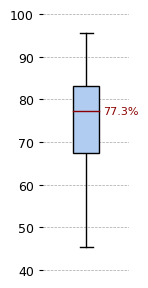

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("similarities_log.json", "r") as f:
    similarity_data = json.load(f)

similarities = [entry["similarity"] * 100 for entry in similarity_data if entry["similarity"] is not None]

median_value = np.median(similarities)

fig, ax = plt.subplots(figsize=(1.5, 3))
box = ax.boxplot(similarities, vert=True, patch_artist=True, widths=0.3, showfliers=False,
                 boxprops=dict(facecolor=[176/255, 205/255, 241/255], color='black'),
                 medianprops=dict(color='darkred'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

ax.text(1.2, median_value, f"{median_value:.1f}%", ha='left', va='center',
        fontsize=8, color='darkred')

ax.set_ylim(39, 101)
ax.set_yticks(np.arange(40, 101, 10))
ax.tick_params(axis='y', labelsize=9, length=3)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('similarity_boxplot_vertical.png', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()


In [ ]:
import json
import numpy as np

with open("similarities_log.json", "r") as f:
    similarity_data = json.load(f)

valid_similarities = [entry["similarity"] for entry in similarity_data if entry["similarity"] is not None]

median_similarity = np.median(valid_similarities)
mean_similarity = np.mean(valid_similarities)

print(f"median_similarity: {median_similarity:.2f}")
print(f"mean_similarity: {mean_similarity:.2f}")

groups_to_collapse = []
for i, similarity_entry in enumerate(similarity_data):
    similarity = similarity_entry.get("similarity")
    if similarity is not None and similarity > median_similarity:
        group = list(all_group_mappings[i].keys())
        groups_to_collapse.append(group)

nodes_to_keep = set()
nodes_to_remove = set()

for group in groups_to_collapse:
    if group:
        representative = group[0]  
        nodes_to_keep.add(representative)
        nodes_to_remove.update(group[1:]) 

seqs_above_median = 0

for i, similarity_entry in enumerate(similarity_data):
    similarity = similarity_entry.get("similarity")
    if similarity is not None and similarity > median_similarity:
        group = all_group_mappings[i]
        sequences = [
            data['sequence']
            for data in group.values()
            if isinstance(data['sequence'], str)
        ]
        seqs_above_median += len(sequences)

print(f"Number of sequences above median ({median_similarity:.2f}): {seqs_above_median}")

seqs_above_median = 0

for i, similarity_entry in enumerate(similarity_data):
    similarity = similarity_entry.get("similarity")
    if similarity is not None and similarity > mean_similarity:
        group = all_group_mappings[i]
        sequences = [
            data['sequence']
            for data in group.values()
            if isinstance(data['sequence'], str)
        ]
        seqs_above_median += len(sequences)

print(f"Number of sequences above mean ({mean_similarity:.2f}): {seqs_above_median}")

import pandas as pd

nodes_df_rna = pd.read_csv("nodes_grape_v2.0_sncRNA.tsv", sep="\t")
edges_df_rna = pd.read_csv("edges_grape_v2.0_sncRNA.tsv", sep="\t")

filtered_nodes_df_rna = nodes_df_rna[~nodes_df_rna['name'].isin(nodes_to_remove)].copy()

filtered_edges_df_rna = edges_df_rna[
    edges_df_rna['subject'].isin(filtered_nodes_df_rna['name']) &
    edges_df_rna['object'].isin(filtered_nodes_df_rna['name'])
].copy()

filtered_nodes_df_rna.to_csv("nodes_filtered_collapse_above_median.tsv", sep="\t", index=False)
filtered_edges_df_rna.to_csv("edges_filtered_collapse_above_median.tsv", sep="\t", index=False)

from grape import Graph

filtered_graph = Graph.from_csv(
    edge_path="edges_filtered_collapse_above_median.tsv",
    edge_list_separator="\t",
    edge_list_header=True,
    sources_column="subject",
    destinations_column="object",
    edge_list_edge_types_column="type",

    node_path="nodes_filtered_collapse_above_median.tsv",
    node_list_separator="\t",
    node_list_header=True,
    nodes_column="name",
    node_list_node_types_column="type",
    node_types_separator=";",

    directed=True,
    name="RNA-KGv2.0_filtered",
)
filtered_graph

Mediana delle similarità: 0.77
Media delle similarità: 0.76
Numero totale di sequenze nei gruppi con similarità sopra la mediana (0.77): 596
Numero totale di sequenze nei gruppi con similarità sopra la media (0.77): 700


<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>RNA-KGv2.0_filtered</h2><p class="paragraph">The directed multigraph RNA-KGv2.0_filtered has 9.30K heterogeneous nodes and 196.38K heterogeneous edges. The RAM requirements for the nodes and edges data structures are 3.33MB and 860.02KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 4.18K, the mode degree is 2, the mean degree is 21.11 and the node degree median is 3.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://rnacentral.org/rna/URS000050DE77_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS000050DE77_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS000050DE77_9606</a> (degree 4.18K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA), <a href='https://rnacentral.org/rna/URS0000353492_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000353492_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000353492_9606</a> (degree 4.08K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA), <a href='https://rnacentral.org/rna/URS00004D84DB_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS00004D84DB_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS00004D84DB_9606</a> (degree 3.34K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA), <a href='https://rnacentral.org/rna/URS0000239117_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000239117_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000239117_9606</a> (degree 2.85K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA) and <a href='https://rnacentral.org/rna/URS0000324096_9606' target='_blank' title='Go to website to get more informations about https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000324096_9606'>https:&#x2f;&#x2f;rnacentral.org&#x2f;rna&#x2f;URS0000324096_9606</a> (degree 2.72K and node types RNA, ncRNA, sncRNA, Small_regulatory_ncRNA and miRNA).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 17 node types, of which the 10 most common are RNA (9.30K nodes, 100.00%), sncRNA (9.30K nodes, 100.00%), ncRNA (9.30K nodes, 100.00%), tsRNA (7.53K nodes, 80.98%), tRF (7.53K nodes, 80.98%), tRF-i (5.42K nodes, 58.22%), Small_regulatory_ncRNA (1.38K nodes, 14.79%), miRNA (1.38K nodes, 14.79%), tRF-1 (1.35K nodes, 14.54%) and pre_miRNA (608 nodes, 6.54%). The node types are multi-label, and the node with most node types has 7 node types. The RAM requirement for the node types data structure is 2.20MB.</p><h4 style="margin: 1em 0 0 0;">Isomorphic node types</h4><p class="paragraph">Isomorphic node types groups are node types describing exactly the same 